## Dataset import


In [1]:
import os
from scipy.io import loadmat

# Path to the directory containing the MATLAB files
directory = "Data_trials"

# Iterate through each participant folder
for participant_folder in os.listdir(directory):
    participant_path = os.path.join(directory, participant_folder)
    if os.path.isdir(participant_path):
        participant_number = participant_folder[1:]  # Extract participant number from folder name

        # Iterate through MATLAB files in the participant folder
        for file_name in os.listdir(participant_path):
            if file_name.endswith(".mat"):
                file_path = os.path.join(participant_path, file_name)

                # Load MATLAB file
                data = loadmat(file_path)

                # Extract the variable name from the file name (excluding extension)
                variable_name = os.path.splitext(file_name)[0]

                # Assign loaded data to a variable with the same name as the file
                globals()[variable_name] = data

                print(f"Loaded data from {file_name} into variable '{variable_name}'")


Loaded data from P01_T1_R1_1.mat into variable 'P01_T1_R1_1'
Loaded data from P01_T1_R1_2.mat into variable 'P01_T1_R1_2'
Loaded data from P01_T1_R1_3.mat into variable 'P01_T1_R1_3'
Loaded data from P01_T1_R1_4.mat into variable 'P01_T1_R1_4'
Loaded data from P01_T1_R1_5.mat into variable 'P01_T1_R1_5'
Loaded data from P01_T1_R1_6.mat into variable 'P01_T1_R1_6'
Loaded data from P01_T1_R2_1.mat into variable 'P01_T1_R2_1'
Loaded data from P01_T1_R2_2.mat into variable 'P01_T1_R2_2'
Loaded data from P01_T1_R2_3.mat into variable 'P01_T1_R2_3'
Loaded data from P01_T1_R2_4.mat into variable 'P01_T1_R2_4'
Loaded data from P01_T1_R2_5.mat into variable 'P01_T1_R2_5'
Loaded data from P01_T1_R2_6.mat into variable 'P01_T1_R2_6'
Loaded data from P01_T1_R3_1.mat into variable 'P01_T1_R3_1'
Loaded data from P01_T1_R3_2.mat into variable 'P01_T1_R3_2'
Loaded data from P01_T1_R3_3.mat into variable 'P01_T1_R3_3'
Loaded data from P01_T1_R3_4.mat into variable 'P01_T1_R3_4'
Loaded data from P01_T1_

## Plot signal


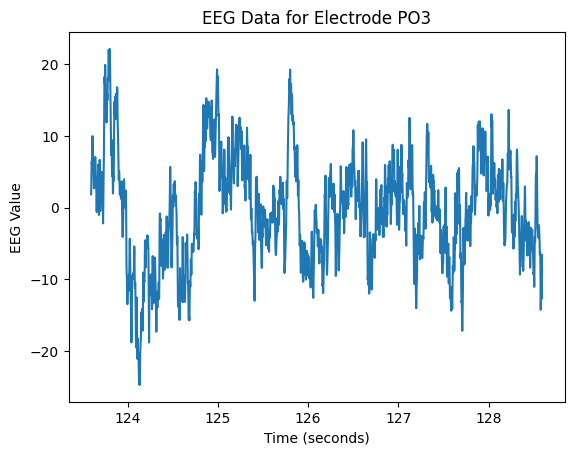

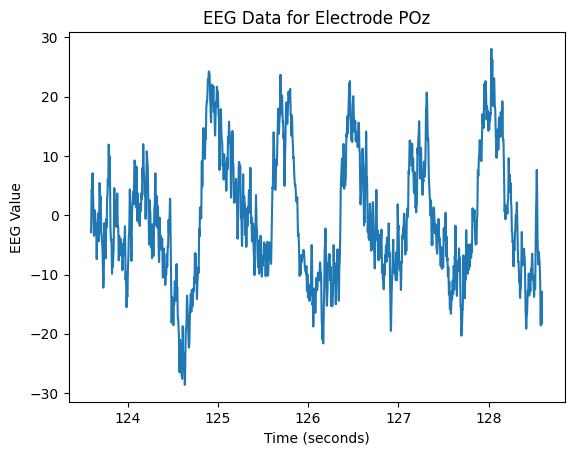

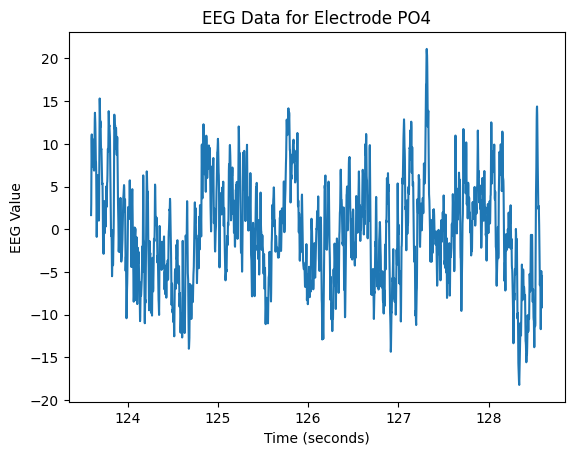

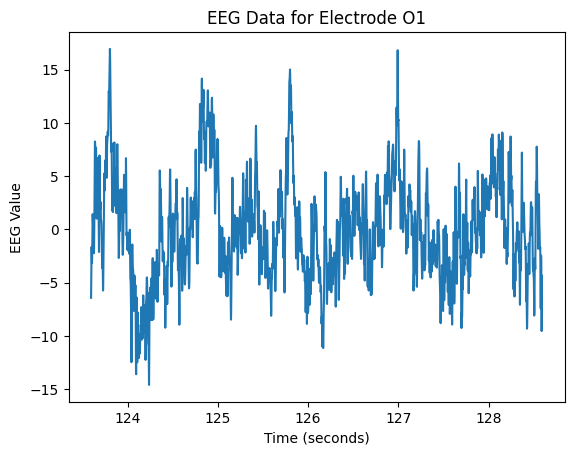

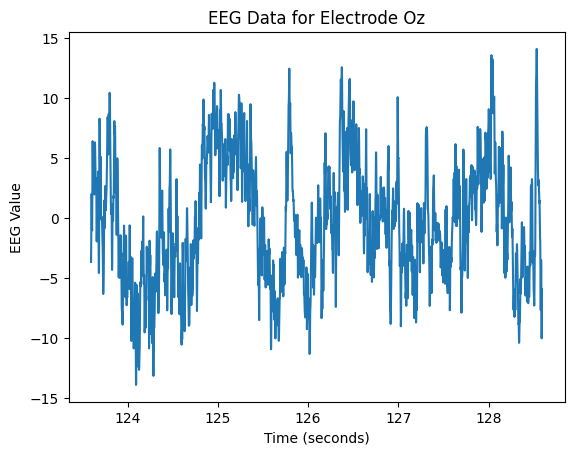

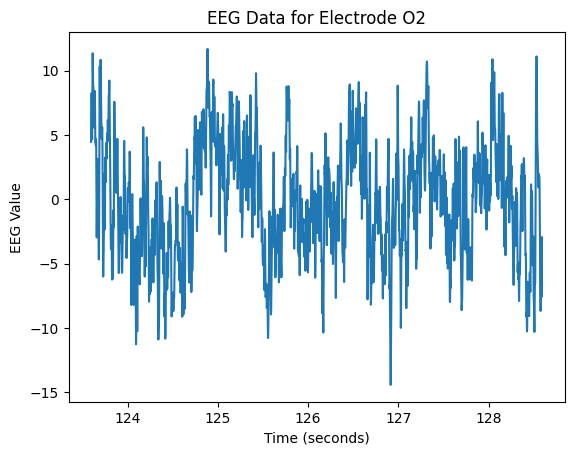

In [6]:
import matplotlib.pyplot as plt

# Extract data from the loaded MATLAB variable
data_dict = P01_T1_R1_1
timestamp = data_dict['P01_T1_R1_1'][0]
eeg_data = data_dict['P01_T1_R1_1'][1:]

# Electrode labels
electrode_labels = ['PO3', 'POz', 'PO4', 'O1', 'Oz', 'O2']

# Plot each electrode's data
for i, electrode_data in enumerate(eeg_data):
    plt.figure()
    plt.plot(timestamp, electrode_data)
    plt.title(f'EEG Data for Electrode {electrode_labels[i]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('EEG Value')
    plt.show()


# mini fft


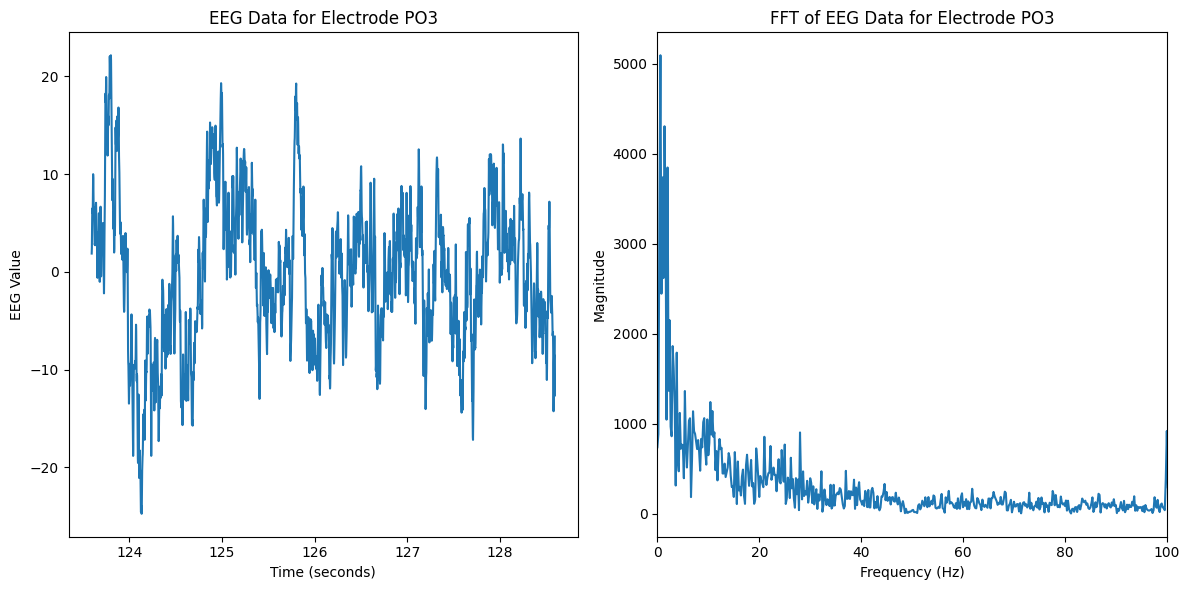

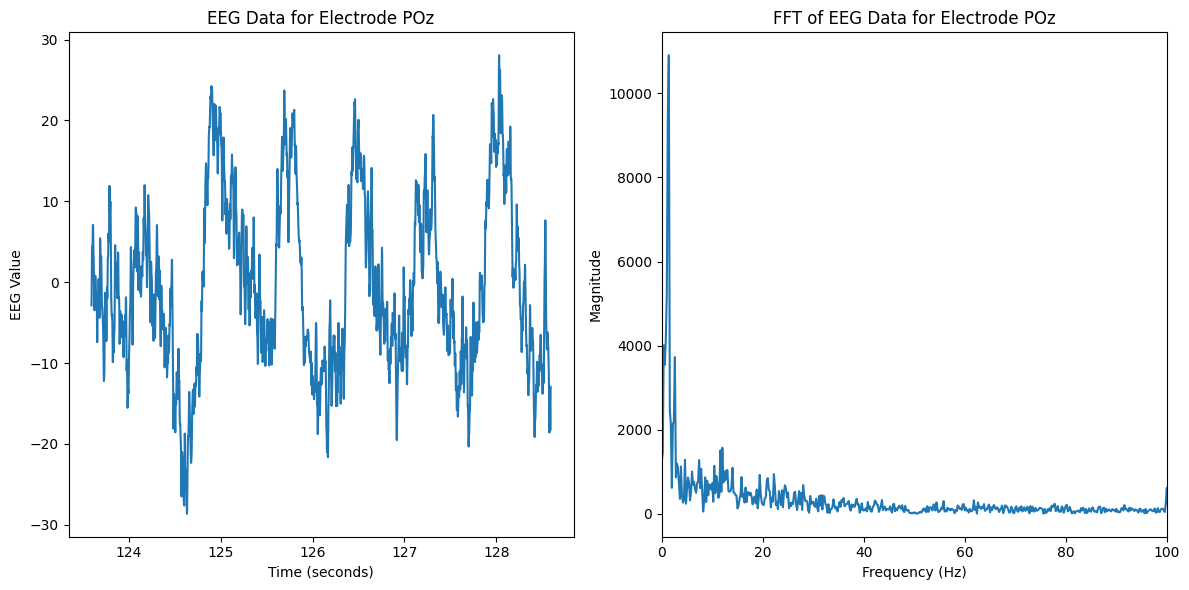

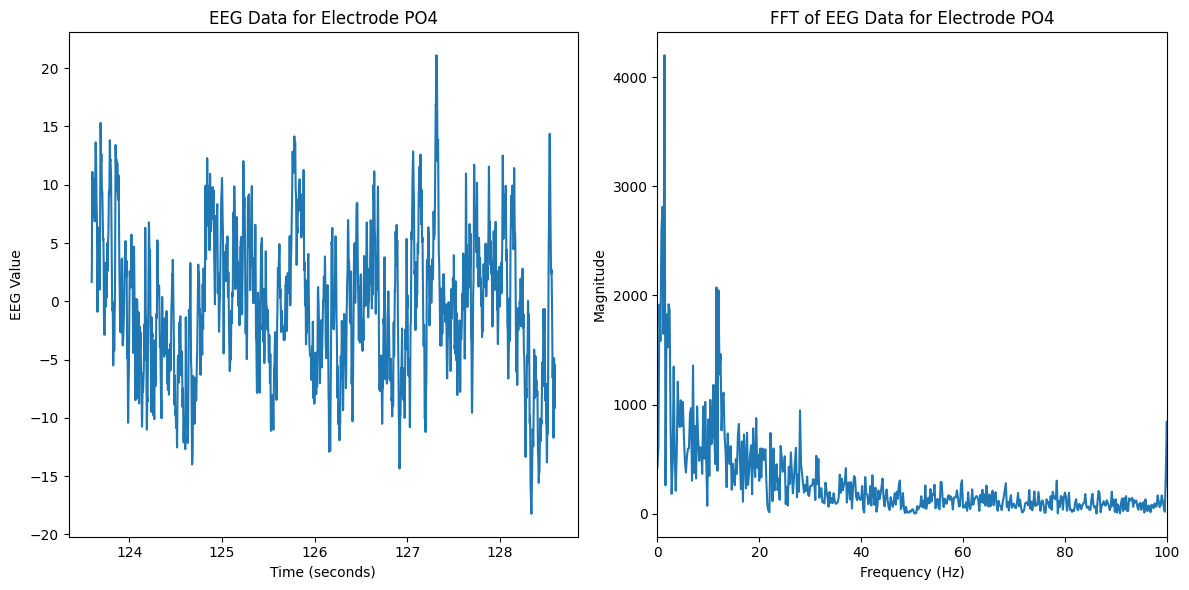

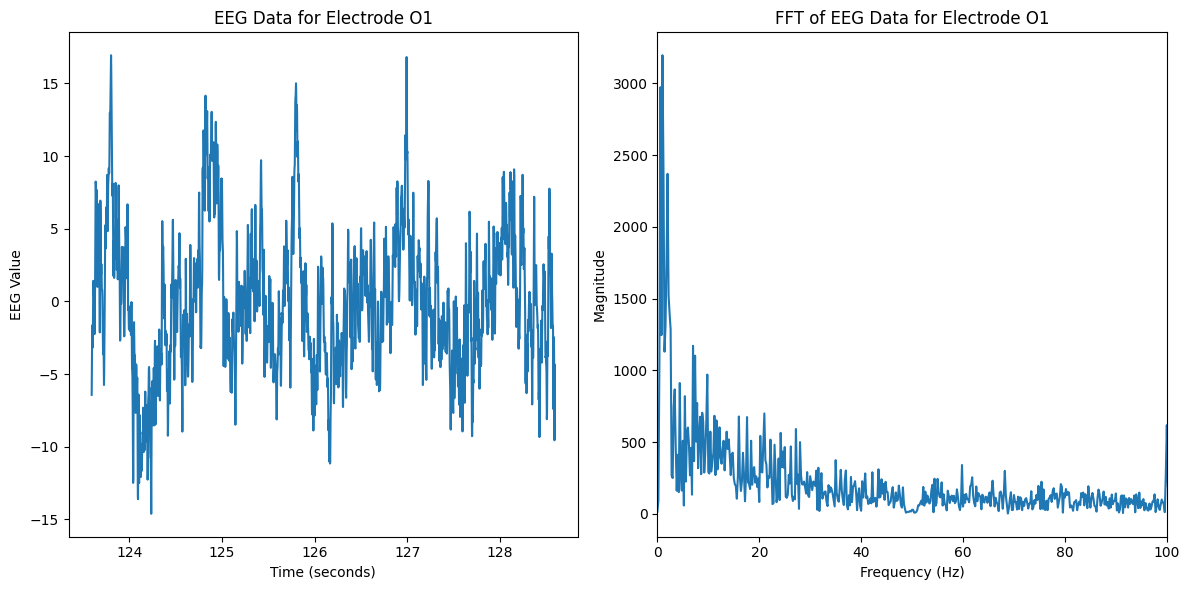

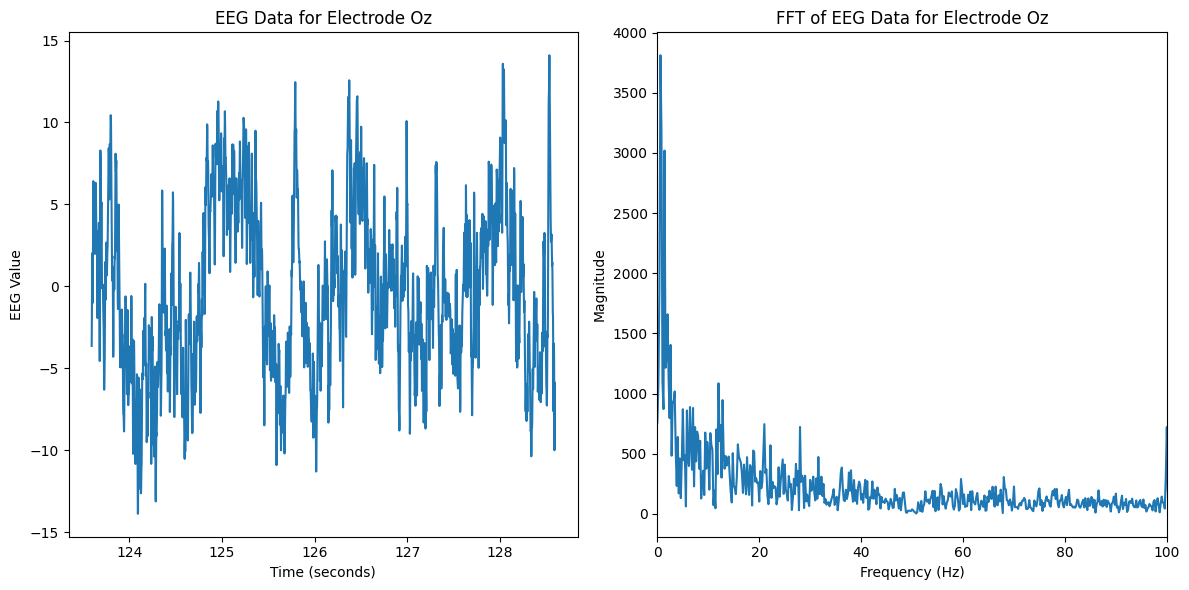

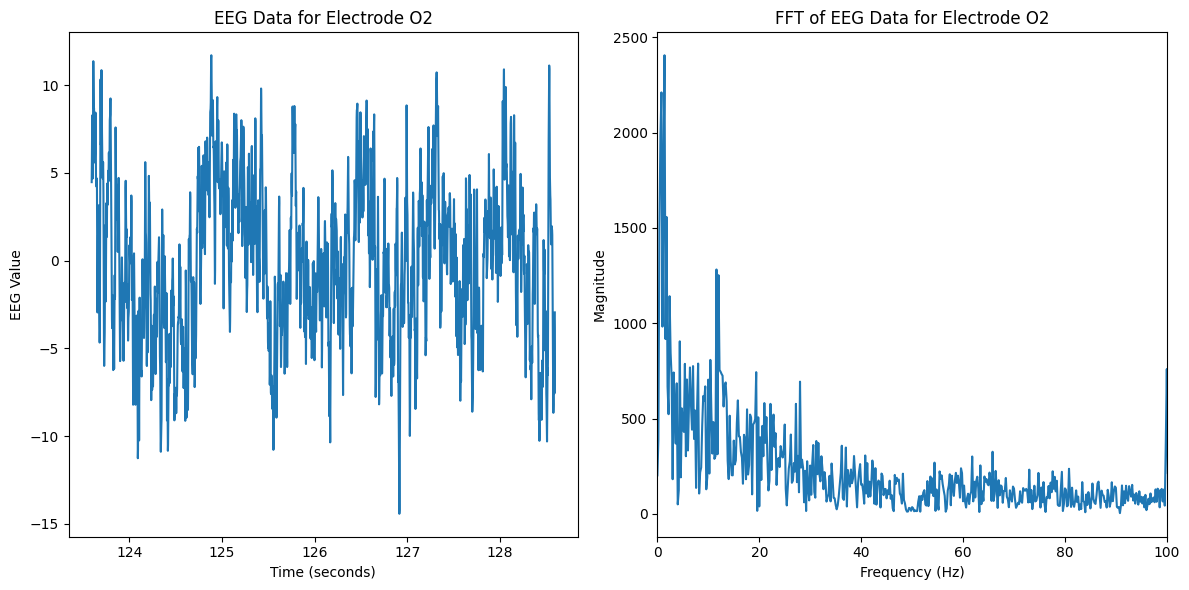

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from the loaded MATLAB variable
data_dict = P01_T1_R1_1
timestamp = data_dict['P01_T1_R1_1'][0]
eeg_data = data_dict['P01_T1_R1_1'][1:]

# Electrode labels
electrode_labels = ['PO3', 'POz', 'PO4', 'O1', 'Oz', 'O2']

# Plot each electrode's data and its FFT
for i, electrode_data in enumerate(eeg_data):
    # Compute FFT
    fft_data = np.fft.fft(electrode_data)
    freq = np.fft.fftfreq(len(timestamp), d=timestamp[1] - timestamp[0])
    fft_mag = np.abs(fft_data)

    # Plot EEG data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(timestamp, electrode_data)
    plt.title(f'EEG Data for Electrode {electrode_labels[i]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('EEG Value')

    # Plot FFT
    plt.subplot(1, 2, 2)
    plt.plot(freq[:len(freq)//2], fft_mag[:len(freq)//2])
    plt.title(f'FFT of EEG Data for Electrode {electrode_labels[i]}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 100)  # Limit the frequency range for better visualization
    plt.tight_layout()
    plt.show()


# PSD

C:\Users\Simão Francisco\AppData\Local\Temp\ipykernel_14928\1781032673.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 10 * np.log10(psd_vals))


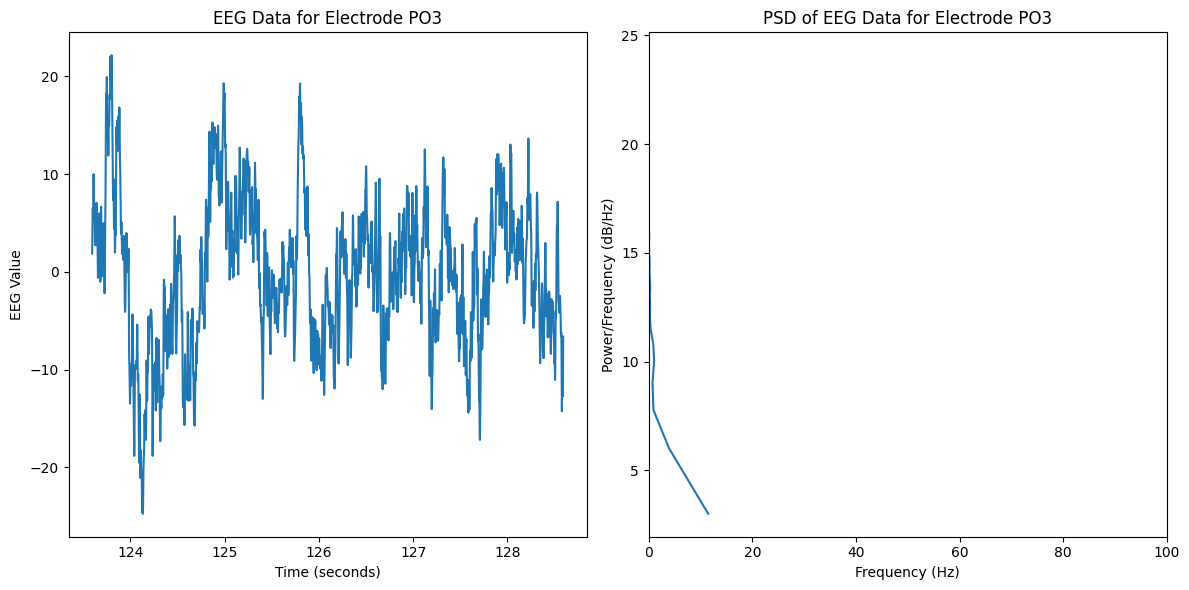

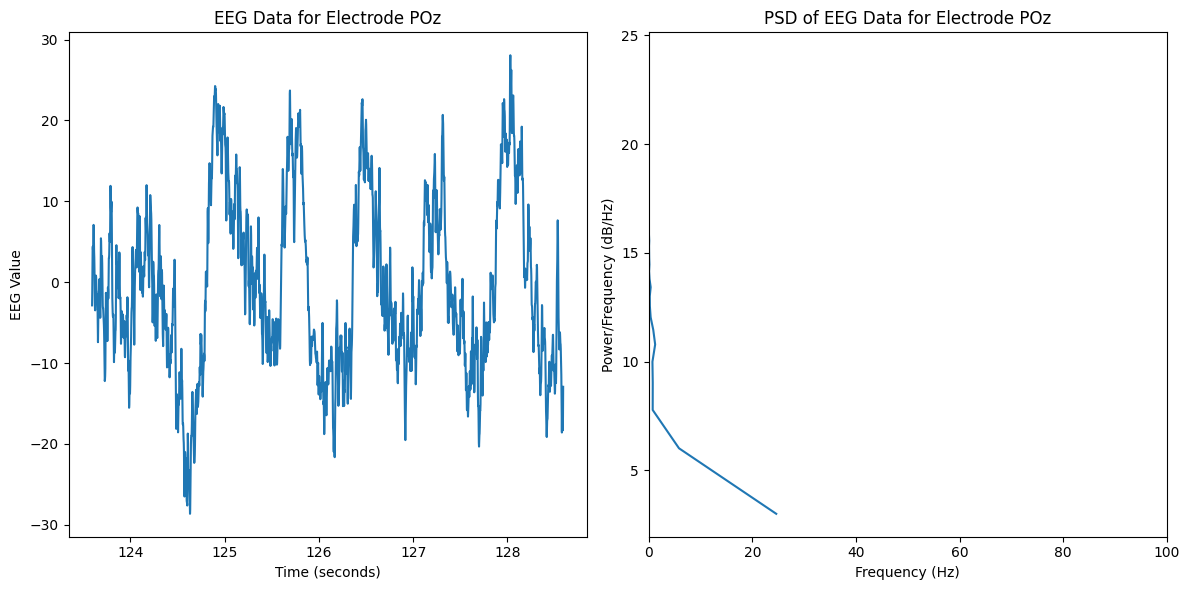

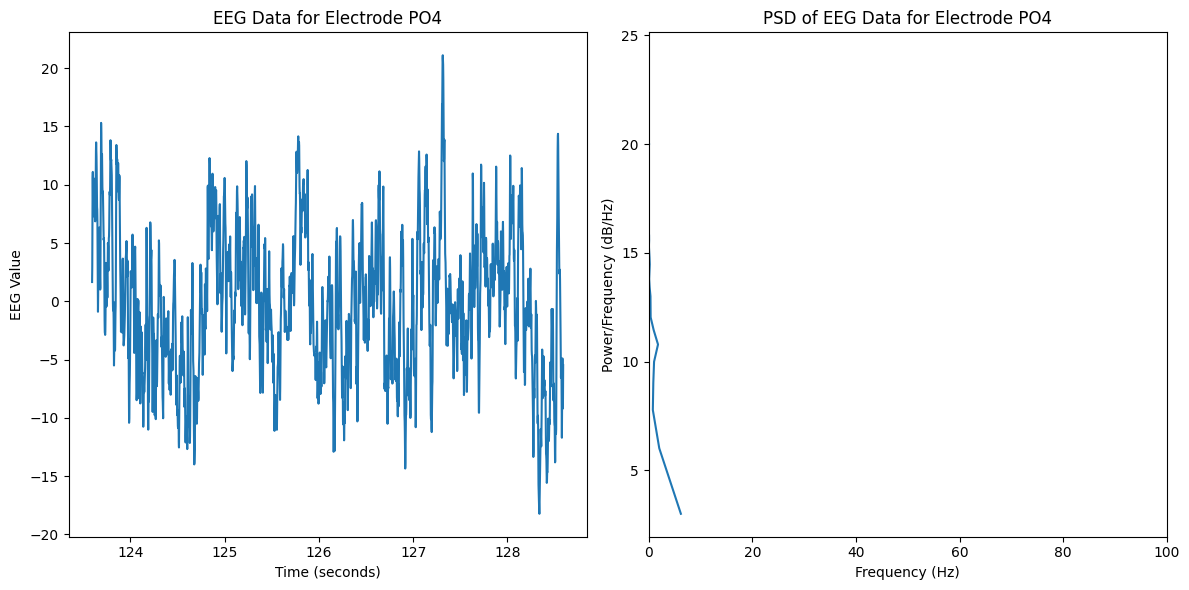

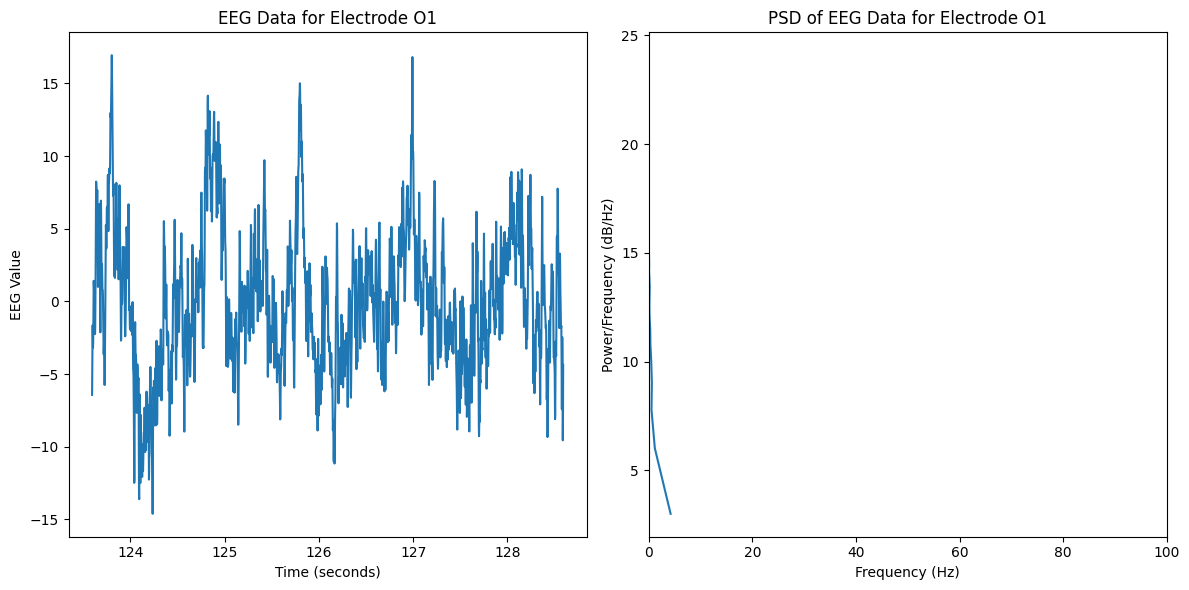

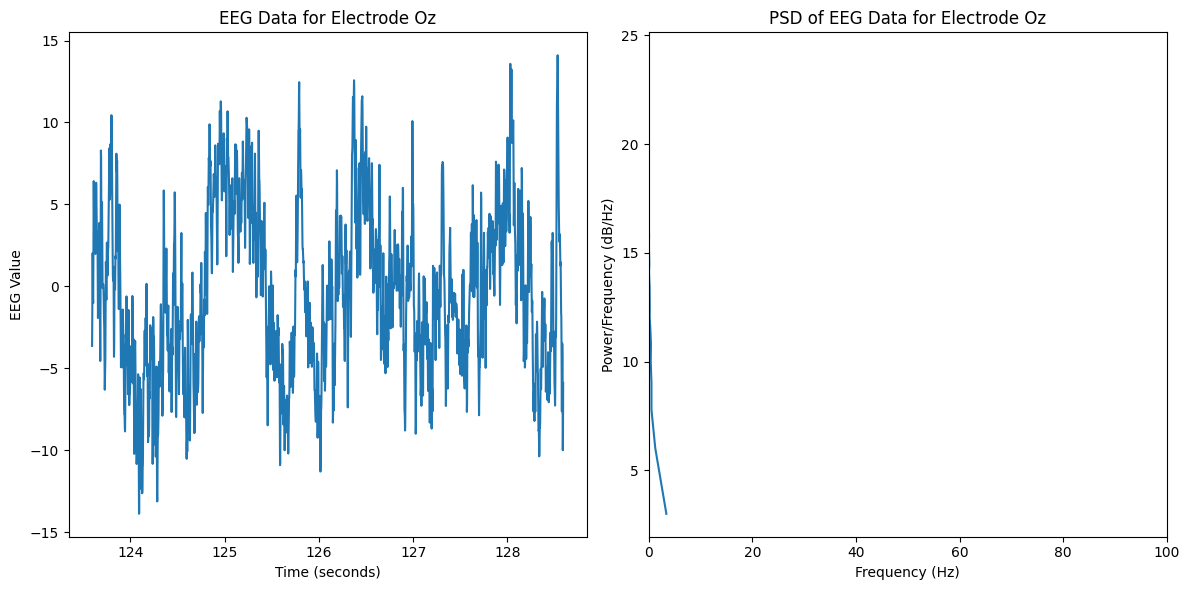

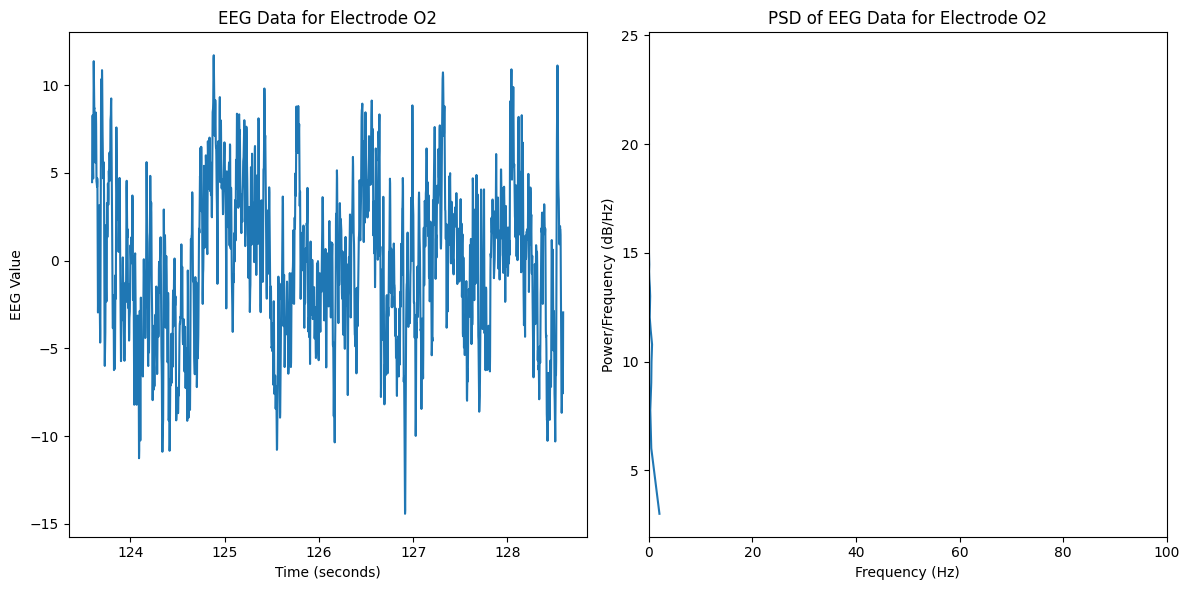

In [8]:
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
import numpy as np

# Extract data from the loaded MATLAB variable
data_dict = P01_T1_R1_1
timestamp = data_dict['P01_T1_R1_1'][0]
eeg_data = data_dict['P01_T1_R1_1'][1:]

# Electrode labels
electrode_labels = ['PO3', 'POz', 'PO4', 'O1', 'Oz', 'O2']

# Plot each electrode's data and its PSD
for i, electrode_data in enumerate(eeg_data):
    # Compute PSD
    freqs, psd_vals = psd(electrode_data, NFFT=256, Fs=1/(timestamp[1] - timestamp[0]))

    # Plot EEG data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(timestamp, electrode_data)
    plt.title(f'EEG Data for Electrode {electrode_labels[i]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('EEG Value')

    # Plot PSD
    plt.subplot(1, 2, 2)
    plt.plot(freqs, 10 * np.log10(psd_vals))
    plt.title(f'PSD of EEG Data for Electrode {electrode_labels[i]}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.xlim(0, 100)  # Limit the frequency range for better visualization
    plt.tight_layout()
    plt.show()


# mais brincadeira

C:\Users\Simão Francisco\AppData\Local\Temp\ipykernel_14928\3137782629.py:36: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 10 * np.log10(psd_vals))


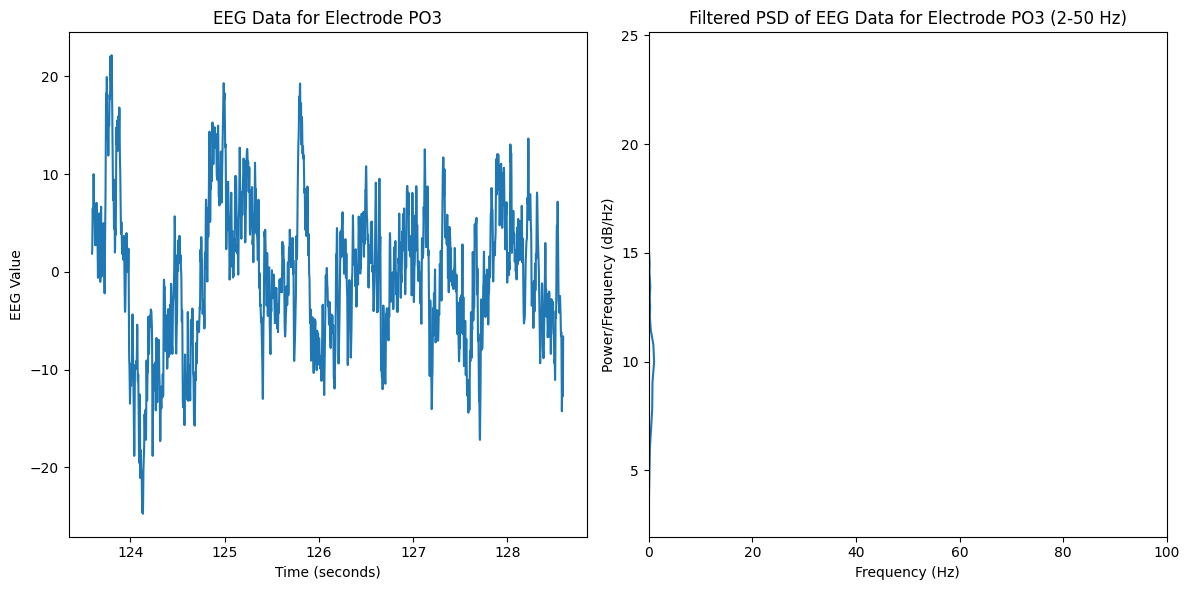

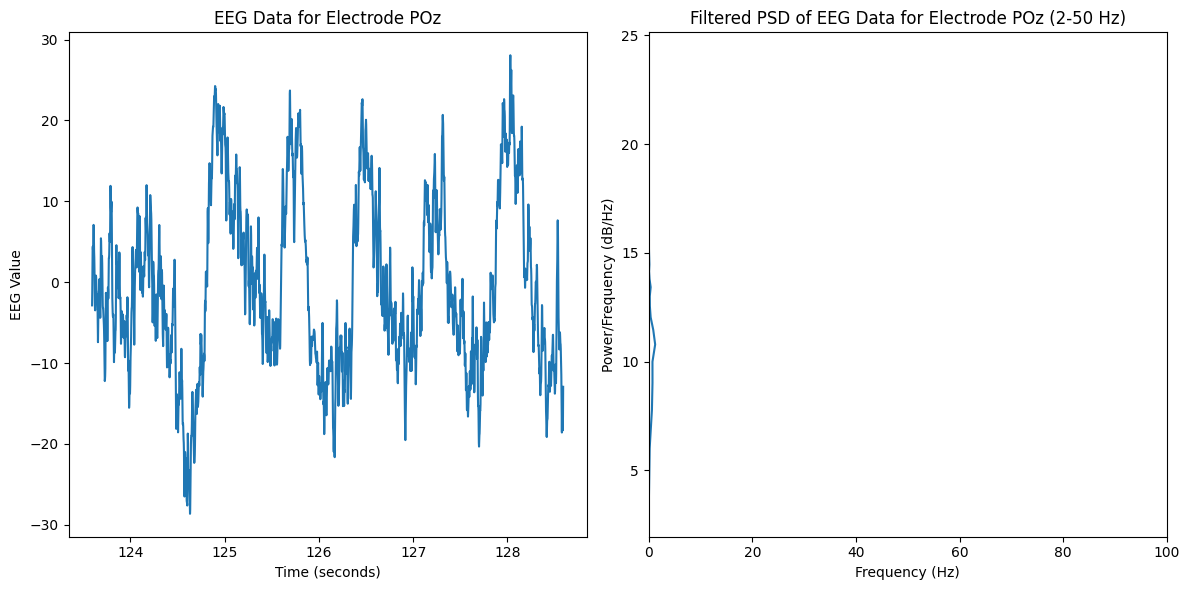

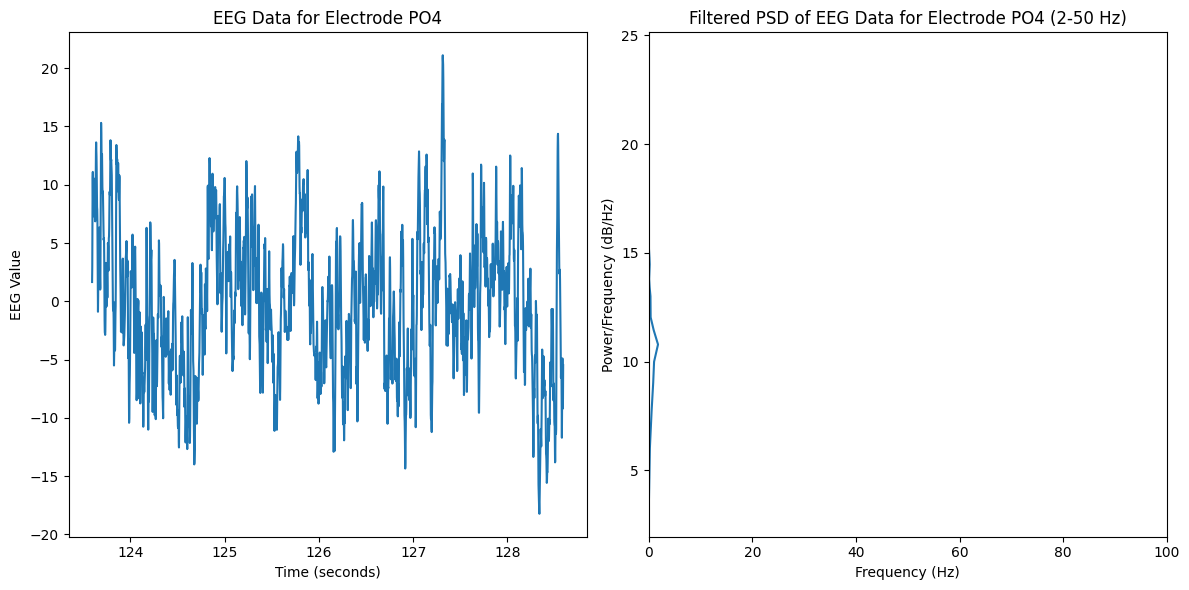

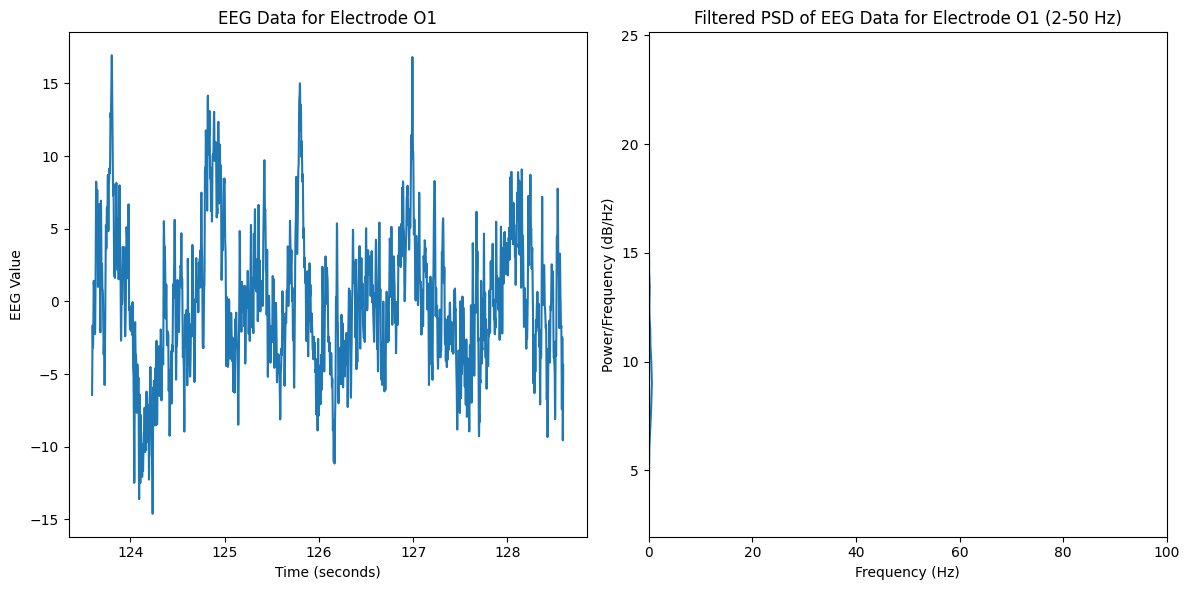

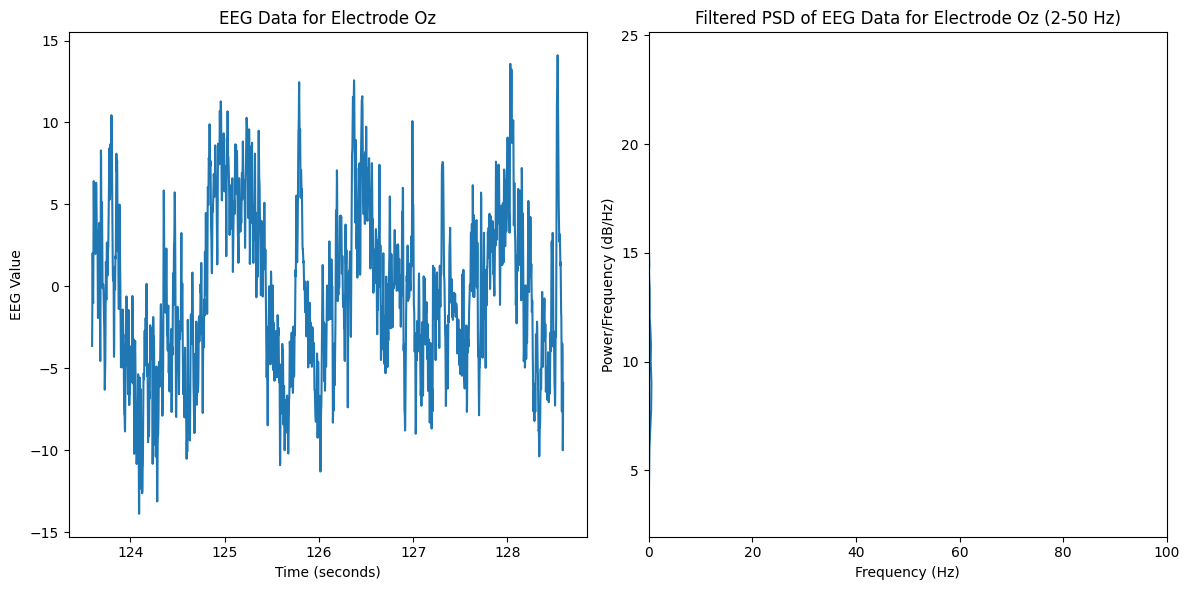

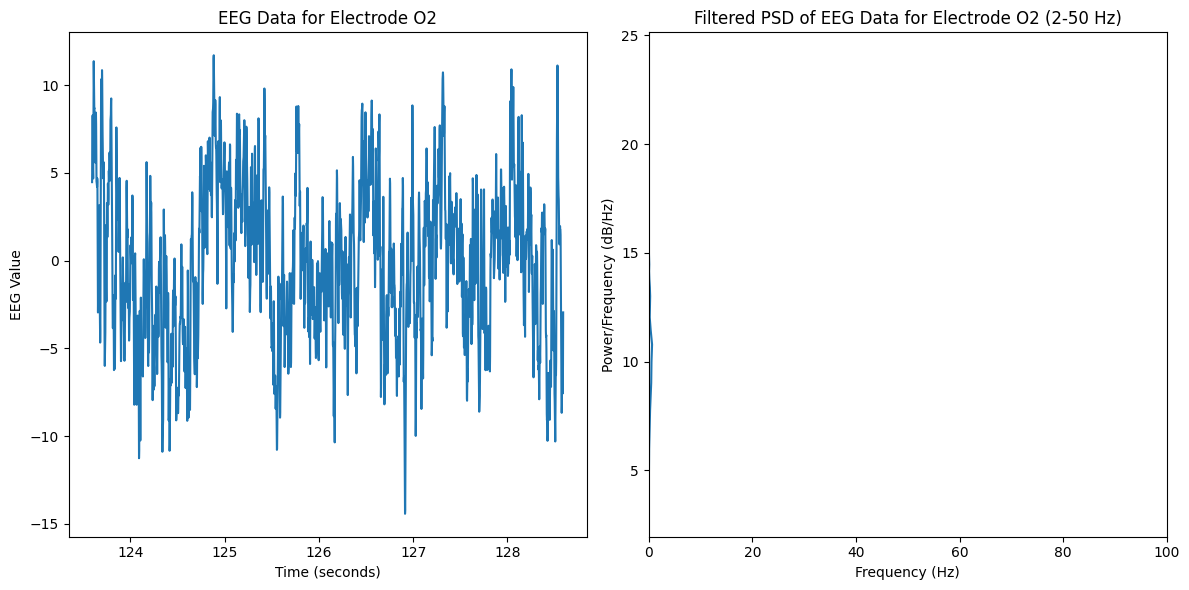

In [11]:
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
import numpy as np
from scipy.signal import butter, filtfilt

# Define bandpass filter parameters
lowcut = 4.5  # Lower cutoff frequency (Hz)
highcut = 40  # Higher cutoff frequency (Hz)
fs = 1 / (timestamp[1] - timestamp[0])  # Sampling frequency (Hz)

# Compute filter coefficients
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq
order = 4  # Filter order
b, a = butter(order, [low, high], btype='band')  # Compute filter coefficients

# Plot each electrode's data and its filtered PSD
for i, electrode_data in enumerate(eeg_data):
    # Filter EEG data
    filtered_data = filtfilt(b, a, electrode_data)

    # Compute PSD of filtered data
    freqs, psd_vals = psd(filtered_data, NFFT=256, Fs=fs)

    # Plot EEG data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(timestamp, electrode_data)
    plt.title(f'EEG Data for Electrode {electrode_labels[i]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('EEG Value')

    # Plot filtered PSD
    plt.subplot(1, 2, 2)
    plt.plot(freqs, 10 * np.log10(psd_vals))
    plt.title(f'Filtered PSD of EEG Data for Electrode {electrode_labels[i]} (2-50 Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.xlim(0, 100)  # Limit the frequency range for better visualization
    plt.tight_layout()
    plt.show()
